In [44]:
from datasets.covertype import CovertypeDataset
from random_forest import RandomForestClassifier, TournamentRandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,f1_score, precision_score, recall_score
import math, time
from tqdm import tqdm
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
path = "../data/covtype/covtype.data"
dataset = CovertypeDataset(path=path)


In [3]:
dataset.data.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dataset.data.loc[:200, :20]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3017,46,22,212,52,5118,221,188,92,2352,...,0,0,0,0,0,0,0,0,0,0
197,3077,256,4,618,210,6230,210,242,170,3734,...,0,0,0,0,0,0,0,0,0,0
198,2929,338,8,190,39,4393,202,228,165,6106,...,0,0,0,0,0,0,0,0,0,0
199,2735,127,12,67,6,2806,240,232,120,4924,...,0,0,0,0,0,0,0,0,0,0


## Pierwsze 9 atrybutów  - 

<Axes: >

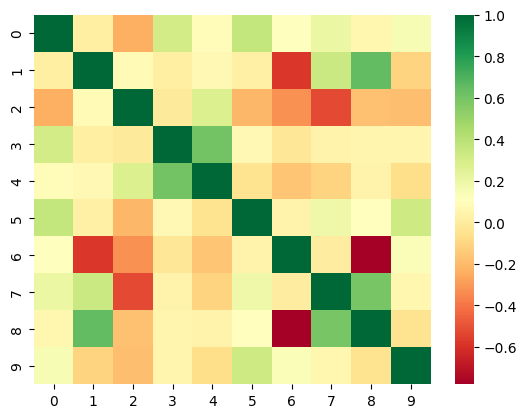

In [27]:
sns.heatmap(dataset.data.loc[:, :9].corr(), cmap="RdYlGn")

<Axes: >

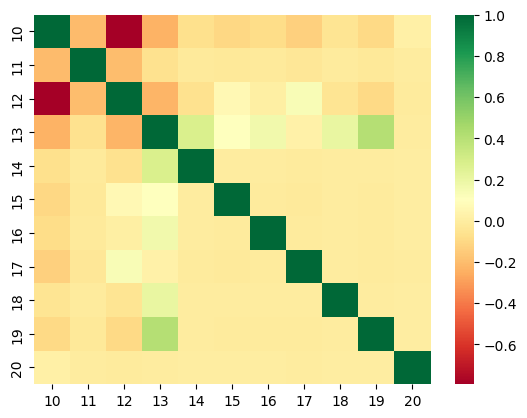

In [32]:
sns.heatmap(dataset.data.loc[:, 10:20].corr(), cmap="RdYlGn")

## Soil types

In [51]:
dataset.data.loc[:, 11:51].sum(axis="columns").value_counts()

2    308767
1    261138
0     11107
Name: count, dtype: int64

In [52]:
dataset.data.loc[:, 11:51].sum(axis=0)

11     29884
12    253364
13     36968
14      3031
15      7525
16      4823
17     12396
18      1597
19      6575
20       105
21       179
22      1147
23     32634
24     12410
25     29971
26     17431
27       599
28         3
29      2845
30      3422
31      1899
32      4021
33      9259
34       838
35     33373
36     57752
37     21278
38       474
39      2589
40      1086
41       946
42    115247
43     30170
44     25666
45     52519
46     45154
47      1611
48      1891
49       119
50       298
51     15573
dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = dataset.split(test_size=0.2, random_state=42)